In [1]:
%autosave 10

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import sklearn
from sklearn .linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [3]:
df = pd.read_csv('C:\Data-Science-Intern-2-Mini-Project-Task\Task-1\cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [4]:
df['default payment next month'].mean()

0.2217971797179718

In [5]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [6]:
X=df['LIMIT_BAL'].values.reshape(-1,1)
y=df['default payment next month']

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [9]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, \
                                intercept_scaling=1, max_iter=100, multi_class='auto', n_jobs=None, \
                                penalty='l2', random_state=None, solver='liblinear', tol=0.0001, \
                                verbose=0, warm_start=False)
log_model.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [10]:
y_pred = log_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
is_correct = y_pred == y_test
np.mean(is_correct)

0.7845490343146446

In [12]:
score = log_model.score(X_test,y_test)
print(100*score)

78.45490343146446


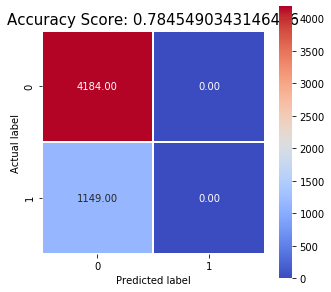

In [13]:
from sklearn import metrics 
import seaborn as sns

cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=1, square = True,cmap='coolwarm');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [14]:
pred_prob=log_model.predict_proba(X_test)
pred_prob

array([[0.77041163, 0.22958837],
       [0.95070283, 0.04929717],
       [0.70564981, 0.29435019],
       ...,
       [0.69148933, 0.30851067],
       [0.58328856, 0.41671144],
       [0.59953924, 0.40046076]])

In [15]:
prob_sum = np.sum(pred_prob,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [16]:
from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve
roc_auc_score(y_test,pred_prob[:,1])

0.6249951117190606

_________________________________________________________________________
**Now, plot the ROC curve.**


In [17]:
fpr,tpr,thres=roc_curve(y_test,pred_prob[:,1])

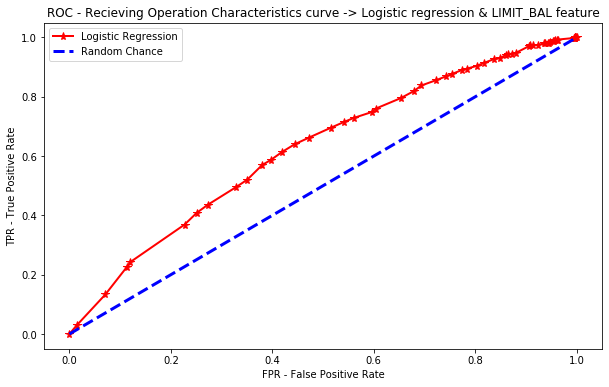

In [18]:
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,"*-",color='r',linewidth=2,markersize=8)
plt.plot([0,1],[0,1],'b--',linewidth=3,markersize=6)

plt.xlabel('FPR - False Positive Rate')
plt.ylabel('TPR - True Positive Rate')
plt.title('ROC - Recieving Operation Characteristics curve -> Logistic regression & LIMIT_BAL feature')
plt.legend(['Logistic Regression','Random Chance'])

In [19]:
from numpy import argmax
J = tpr - fpr
ix = argmax(J)
best_thresh = thres[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.294350


In [20]:
preds = np.where(log_model.predict_proba(X_test)[:,1] > best_thresh, 1, 0)
preds

array([0, 0, 0, ..., 1, 1, 1])

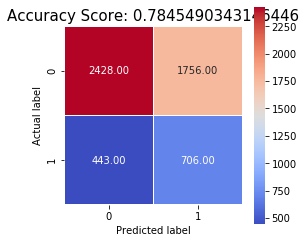

In [21]:
from sklearn import metrics 
import seaborn as sns

cm = metrics.confusion_matrix(y_test, preds)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'coolwarm');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);


_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [22]:
from sklearn.metrics import precision_recall_curve,precision_score,precision_recall_fscore_support
precision,recall,thresh1=precision_recall_curve(y_test,pred_prob[:,1])

In [23]:
thresh1

array([0.02414661, 0.02752758, 0.02938642, 0.03136674, 0.0334759 ,
       0.03572166, 0.03811213, 0.04065583, 0.04336165, 0.04623887,
       0.04929717, 0.05254661, 0.05599762, 0.059661  , 0.0635479 ,
       0.06766982, 0.07203853, 0.07666608, 0.08156477, 0.08674706,
       0.09222555, 0.0980129 , 0.10412176, 0.1105647 , 0.1173541 ,
       0.12450205, 0.13202025, 0.1399199 , 0.14821151, 0.15690485,
       0.16600872, 0.17553084, 0.18547766, 0.19585425, 0.20666406,
       0.21790883, 0.22958837, 0.24170045, 0.25424064, 0.2672022 ,
       0.28057595, 0.29435019, 0.30851067, 0.32304051, 0.33792025,
       0.35312785, 0.36863879, 0.38442614, 0.40046076, 0.41671144,
       0.43314514, 0.44972724, 0.46642181, 0.48319193])

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0.5, 1.0, 'Precision and recall Curve - >  logistic regression & LIMIT_BAL')

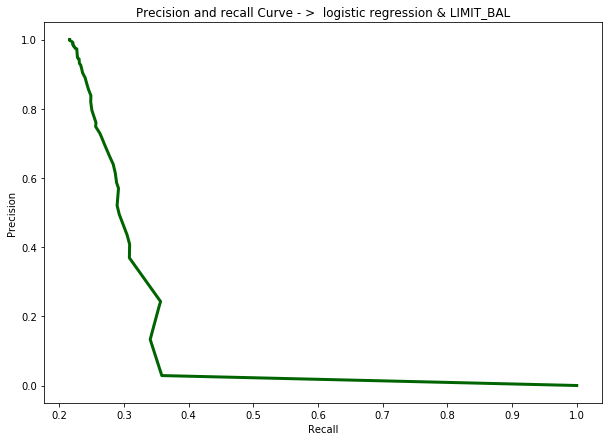

In [24]:
plt.figure(figsize=(10,7))
plt.plot(precision,recall,color='darkgreen',linewidth=3)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall Curve - >  logistic regression & LIMIT_BAL')

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [25]:
from sklearn.metrics import auc
auc(recall,precision)

0.30633527881747774

In [26]:
roc_auc_score(y_test,pred_prob[:,1])


0.6249951117190606

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [27]:
xtrain_pred=log_model.predict(X_train)
xtrain_pred_proba=log_model.predict_proba(X_train)
xtrain_pred_proba              

array([[0.58328856, 0.41671144],
       [0.82446916, 0.17553084],
       [0.91843523, 0.08156477],
       ...,
       [0.85178849, 0.14821151],
       [0.7327978 , 0.2672022 ],
       [0.53357819, 0.46642181]])

In [28]:
roc_auc_score(y_train,xtrain_pred_proba[:,1])

0.6171776375055599